
# <span style="color:rgb(213,80,0)">Modelado de un robot Scara</span>

Hecho por


Islas Escobar Alejandro


Mujica Zeballos Carla

## Introducción

Un robot SCARA (Selective Compliance Assembly Robot Arm) es un manipulador industrial de brazo articulado diseñado para realizar tareas de alta velocidad y precisión, como ensamblaje, manipulación de piezas, empaque y soldadura. Su estructura permite una gran rigidez en el plano horizontal y cierto grado de flexibilidad en el eje vertical, lo que lo hace especialmente eficiente en operaciones planas de posicionamiento y orientación.


En el presente trabajo se desarrolla el modelado cinemático y dinámico completo de un robot serial tipo SCARA, con el propósito de analizar de manera integral su comportamiento mecánico, comprendiendo cómo la posición y el movimiento de cada articulación influyen en las demás. Este estudio permite obtener las ecuaciones que describen la relación entre las variables articulares y el movimiento del efector final, proporcionando una base sólida para el diseño de estrategias de control y simulación del robot.


En robótica, la representación de movimientos en el espacio tridimensional se realiza mediante matrices de transformación homogénea, las cuales combinan operaciones de rotación y traslación en una única estructura matemática. Estas matrices permiten describir la orientación y posición relativa entre los distintos eslabones de un robot, proporcionando una herramienta fundamental para el análisis y modelado de su movimiento.


En el caso del robot SCARA, las transformaciones homogéneas son esenciales para establecer las relaciones cinemáticas entre las articulaciones y el efector final, permitiendo calcular su posición y orientación a partir de los ángulos articulares. Este enfoque constituye la base del modelo directo, a partir del cual se derivan posteriormente la cinemática inversa, el Jacobiano y el modelo dinámico del manipulador.


In [1]:
%Deficición de la función de manera simbolica
syms Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j)

%Definición de la transformación homogénea general
Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j) = [cos(ai_j)*cos(bi_j) cos(ai_j)*sin(bi_j)*sin(gi_j)-sin(ai_j)*cos(gi_j) sin(ai_j)*sin(gi_j)+cos(ai_j)*sin(bi_j)*cos(gi_j) x_i_j; sin(ai_j)*cos(bi_j) cos(ai_j)*cos(gi_j)+sin(ai_j)*sin(bi_j)*sin(gi_j) sin(ai_j)*sin(bi_j)*cos(gi_j)-cos(ai_j)*sin(gi_j) y_i_j; -sin(bi_j) cos(bi_j)*sin(gi_j) cos(bi_j)*cos(gi_j) z_i_j; 0 0 0 1]

## Modelado del robot Scara

Utilizando el análisis general de un eslabón rectangular, se plantea un análisis en el que cada uno de los eslabones tendra dos puntos asociados a una junta rotacional. Cada eslabón tiene una limitación debido a la junta de unión que tienen con el eslabón anterior, a excepción del primer eslabón rojo, cuya junta está anclada a la base del robot y limita el movimiento de todo el sistema. Por otro lado, el tercer eslabón azul tiene un eslabón denomindado P, el cual es considerado como el punto de solución del sistema, puesto que este punto representa el medio por el cual el robot interactúa con algún elemento de su entorno.

<p style="text-align:left">
   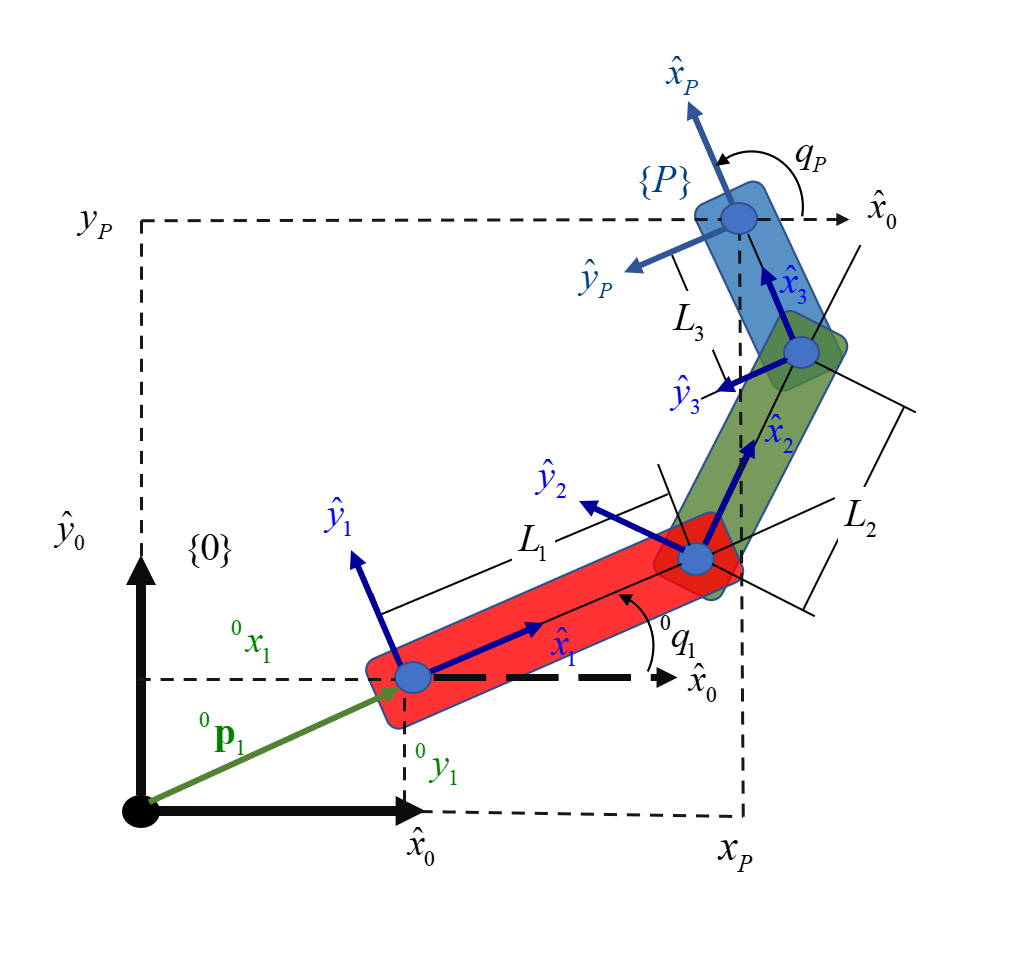
</p>

### Planteamiento del modelo cinemático de la posición

El objetivo de este modelo es describir la posición y orientación de algún elemento dentro de la cadena cinemática del robot. Este punto se le denomina como efecto final y esta relacionado con el punto P. Para el planteamiento del modelo es necesario establecer sistemas de referencia relativos en cada una de las juntas del robot, con la misma orientación del eslabón a la que está asociada, para describir la posición y orientación relatica de un eslabón respecto al anterior. El modelo de la posición de P es con respecto al sistema inercial 0.


Para el modelo se establece una transformación homogénea compuesta por un vector de posición con las posiciones en el plano X\-Y y por una matriz de rotación alrededor del plano Z\_0. El ángulo de rotación se determina con el componente x del eslabón y el componente x del sistema anterior, mientras que la posición se determina respecto al tamaño o longitud de cada eslabón.


In [2]:
syms x_O_1 y_O_1 theta_O_1 L_2 theta_1_2 L_3 theta_2_3 L_1

%Transformación que relaciona el sistema 1 con respecto al sistema inercial
T_O_1 = Tij(x_O_1,y_O_1,0,0,0,theta_O_1)

In [3]:
%Transformación que relaciona el sistema 2 con respecto al sistema 1
T_1_2 = Tij(L_1,0,0,0,0,theta_1_2)

In [4]:
%Transformación que relaciona el sistema 2 con respecto al sistema 3
T_2_3 = Tij(L_2,0,0,0,0,theta_2_3)

In [5]:
%Transformación que relaciona el sistema P con respecto al sistema 3
T_3_P = Tij(L_3,0,0,0,0,0)


La descripción de las relaciones de la posición y la orientación del actuador final respecto al sistema inercial en función de la postura de los eslabones de la cadena cinemática se obtiene al multiplicar todas las transformaciones obtenidas de manera consecutiva.


In [6]:
%Transformación del sistema P con respecto al sistema inercial
T_O_P = simplify(T_O_1*T_1_2*T_2_3*T_3_P)


De la transformación anterior obtenemos el vector de postura del robot con respecto al sistema inercial y la orientación del sistema P. En este caso, la orientación del sistema P está dado por la suma de los ángulos de cada unade las juntas rotacionales. Con estos dos componentes podemos establecer el vector de posturas ξ del sistema P respecto al sistema 0.


In [7]:
xi_O_P = [T_O_P(1,4);T_O_P(2,4);theta_O_1+theta_1_2+theta_2_3]


El vector ξ está compuesto por el conjunto de variables que describen la postura de cada una de las juntas de la cadena cinemática. Estas variables se les conoce como variables de configuración, las cuales conforman el conjunto q.


In [8]:
q = [theta_O_1; theta_1_2; theta_2_3]


Esto permite que la posición y orientación pueda ser descrita mediante coordenadas del sistema inercial o descrita en términos de las variables del conjunto q. Cada vector tiene un nombre diferente, denominados vector de pose y vector de postura respectivamente. Ambos vectores describen al sistema P, por lo que ambos son equivalentes. A esta equivalencia se le conoce como restricciones cinemáticas de la postura, siendo este el modelo cinemático de la postura y a partir de este modelo se derivaran los demás modelos.


$${{\;}^P \zeta }_0^{\;} ={{\;}^P \zeta }_0^{\;} \;\left(q\right)$$
### **Modelo cinemático inverso de la posición**

El modelo inverso nos permite saber controlar el robot para que llegué a un punto deseado con la configuración de las coordenadas de nuestros eslabones, es decir, que conocemos la posición de nuestro punto de solución y nosotros debemos saber la orientación de los eslabones para alcanzar dicho punto. Por lo tanto el modelo cinemático inverso se enfoca en encontrar las variables de configuración del conjunto q, por lo que hay que despejar los ángulos de cada junta cuando ya conocemos la posición del punto final del robot.


Para el análisis, nos enfocamos en la posición de los primeros dos eslabónes, puesto que el tercero solo es un eslabón de ajuste que y el cual está límitado por los dos anteriores, para ello calculamos la posición del extremo de la segunda articulación, el cual se obtiene restando la contribución del último eslabón L3.


In [9]:
syms theta_p_0 theta_1_0 theta_2_1 theta_3_0

x_p_0 = T_O_P(1,4)

In [10]:
y_p_0 = T_O_P(2,4)

In [11]:
%Vector de posición del efector final
P_p_O= [x_p_0;y_p_0;theta_p_0]

In [12]:
x_3_0=x_p_0-L_3*cos(theta_p_0)

In [13]:
y_3_0=x_p_0-L_3*sin(theta_p_0)

In [14]:
%Vector de posición de la primer junta respecto al sistema inercial
P_1_O = [T_O_1(1,4);T_O_1(2,4); theta_1_0]

In [15]:
%Vector de posición de la tercer junta respecto al sistema inercial
P_3_O = [x_3_0;y_3_0;theta_3_0]


Una vez obtenido la posición ${}^0_{\;}P^{\;}_3$, podemos hacer trazar los vectores con los valores conocidos, representadolos de la siguiente manera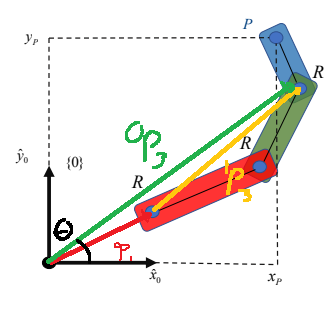


Con el diagrama podemos observar como ${}^0_{\;}P^{\;}_3$ es la suma de los vectores ${}^0_{\;}P^{\;}_1$ y ${}^1_{\;}P^{\;}_3$. Con este análisis podemos trasladar el sistema de referencia a la junta de la base y el primer eslabón y obtener el valor de ${}^1_{\;}P^{\;}_3$

<p style="text-align:left">
   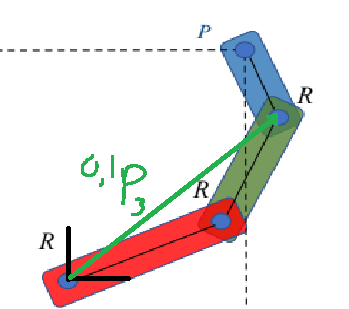
</p>


In [16]:
%Vector de posición de la tercer junta respecto a la primera
P_3_1 = P_3_O - P_1_O


Con esta representación del sistema podemos obtener los ángulos de las juntas utilizando la Ley de Cosenos


In [17]:
%Ángulo de la primer junta respecto al sistema inercial
theta_1_0 = theta_3_0-theta_1_0 - acos((L_1^2 + norm(P_3_1)^2-L_2^2)/(2*L_1*norm(P_3_1)))

In [18]:
%Ángulo de la segunda junta respecto al sistema del primer eslabón
theta_2_1 = pi - acos((L_1^2 + L_2^2- norm(P_3_1)^2)/(2*L_1*L_2))

### Modelo cinemático directo de las velocidades

A partir de las restricciones cinemáticas de la postura podemos obtener el modelo cinemático es necesario derivar ambas partes de las restricciones con respecto al tiempo. El problema radica en que ambas partes están expresadas de forma absoluta, por lo que para derivarlos se debe seguir la regla de la cadena, ya que cada una de las variables puede ser expresada como una función en términos del tiempo. Al momento de derivar el vector ξ que depende de las variables de configuración se debe realizar un acomodo de derivadas parciales respecto a cada variable. Esta distribución de las derivadas parciales conforman la matriz Jacobiana, esta matriz es la que gonierna el sistema. Por otro lado, el vector compuesto por las derivadas de cada variable se le conoce como el vector de velocidades generalizadas del sistema.


$${}^0_{\;}{\dot{\xi} }^{\;}_P=J_{\theta } \dot{\;q}$$

In [19]:
syms J_theta

J_theta

In [20]:
%Se construye el Jacobiano al derivar ξ respecto a cada variable
J_theta = jacobian(xi_O_P,[theta_O_1, theta_1_2,theta_2_3])


Una vez obtenido el Jacobiano, completamos el modelo cinemático de velocidad al igualar las velocidades lineales y angulares con las cuales se mueve el efector final con referencia al sistema inercial 0, con el Jacobiano multiplicado por el vector de velocidades generalizadas del sistema.


In [21]:
syms theta_dot_0_1 theta_dot_1_2 theta_dot_2_3
%Vector de velocidades generalizadas
q_dot = [theta_dot_0_1; theta_dot_1_2; theta_dot_2_3]

In [22]:
%Modelo cinemático directo de las velocidades
xi_dot_O_P = J_theta * q_dot

### Modelo cinemático inverso de las velocidades

El modelo cinemático inverso se utiliza debido a que por lo general se tiene como información de entrada los requerimientos cinemáticos de posición y orientación y a partir de estas ecuaciones se determinan las velocidades que deben proporcionar los motores. Este modelo se establece al despejar el vector de velocidades generalizadas del modelo directo, para ello se requiere el inverso del Jacobiano para multiplicar por ambos lados de la ecuación.


$$\dot{\;q} =J_{\theta }^{-1} \;{}^0_{\;}{\dot{\xi} }^{\;}_P$$

In [23]:
%Se obtiene la matriz Jacobiana inversa
inv(J_theta)


Con este resultado obtenemos el modelo inverso, pudiendo obtener las velocidades del robot


In [24]:
%Despeje del vector de velocidades generalizadas
q_dot = (inv(J_theta))*xi_dot_O_P

### Modelo cinemático directo de las aceleraciones

Para el modelo cinemático de las aceleraciones se debe volver a derivar ambas partes del modelo directo de las velocidades. De la misma manera es necesario aplicar la regla de la cadena debido a que son funciones expresadas de forma absoluta. El resultado de esta operación queda expresado así:


$$\frac{\mathrm{d}}{\mathrm{d}t}{}^0_{\;}{\dot{\xi} }^{\;}_P=\frac{\mathrm{d}}{\mathrm{d}t}\left(J_{\theta } \dot{\;q} \right)$$

$${}^0_{\;}{\ddot{\xi} }^{\;}_P=J_{\theta } \ddot{q} +{\dot{J} }_{\theta } \dot{q}$$

In [25]:
syms theta_ddot_0_1 theta_ddot_1_2 theta_ddot_2_3
%Derivada del vector de velocidades generalizadas
q_ddot = [theta_ddot_0_1; theta_ddot_1_2; theta_ddot_2_3]

In [26]:
%Derivada del Jacobiano

J_dot_theta =simplify(diff(J_theta, theta_O_1)*theta_dot_O_1 + diff(J_theta, theta_1_2)*theta_dot_1_2 + diff(J_theta, theta_2_3)*theta_dot_2_3)


Una vez obtenidas la derivada del Jacobiano y de las velocidades, podemos obtener el modelo directo


In [27]:
xi_ddot_O_P=J_theta*q_ddot+J_dot_theta*q_dot

### Modelo cinemático inverso de las aceleraciones

Para el planteamiento del modelo inverso, se plantea de forma muy similar al directo, pero con la distinción de que se deriva cada uno de los elementos del modelo cinemático inverso de las velocidades con respecto al tiempo.


$$\frac{\mathrm{d}}{\mathrm{d}t}\dot{q} =\frac{\mathrm{d}}{\mathrm{d}t}\left(J_{\theta }^{-1} \;{}^0_{\;}{\dot{\xi} }^{\;}_P\dot{\;} \right)$$

$$\ddot{q} =J_{\theta }^{-1} \;{}^0_{\;}{\ddot{\xi} }^{\;}_P+\dot{J_{\theta }^{-1} } \;{}^0_{\;}{\dot{\xi} }^{\;}_P$$

In [28]:
%Derivada del inverso del Jacobiano

J_inv_dot_theta =simplify(diff(inv(J_theta), theta_O_1)*theta_dot_O_1 + diff(inv(J_theta), theta_1_2)*theta_dot_1_2 + diff(inv(J_theta), theta_2_3)*theta_dot_2_3)


Con la derivada de la inversa del Jacobiano, ya tenemos todos los componentes necesarios para el modelo inverso, cuyo está expresado de la siguiente forma


In [29]:
q_ddot=inv(J_theta)*xi_ddot_O_P+J_inv_dot_theta*xi_dot_O_P

### Modelo dinámico por ecuaciones de Eüler\-Lagrange

Los fundamentos para el uso de las ecuaciones de Eüler\-Lagrange, se necesita aclarar el principio de mínima acción. Este consiste en que la energía que tiene un objeto cuando se mueve, siempre se mantiene constante y equilibrada con la suma de su energía cinética y potencial: $U_T =k_i +u_i =\textrm{cte}$. Sin embargo, en el caso de un robot, los actuadores son elementos externos que proporcionan energía, debido a la intervención de este elemento hay una diferencia entre la energía cinética y la potencia, esta diferencia da como resultado el Langrangiano $\Gamma =\sum_{i=1}^n k_i -\sum_{i=1}^n u_i$. Con este valor podemos determinar la cantidad de trabajo que realiza un cuerpo utilizando la ecuación de pares, lo cual es necesario para el modelo dinámico. Para el cálculo del Lagrangiano es necesario conocer las velocidades lineales y angulares con los que se mueven los centros de masa de cada eslabón, además de su posición con respecto a la referencia de la energía potencial.


Por lo tanto, necesitamos calcular la energía cinética y potencial del centro de masa de cada eslabón, para ello el primer paso es calcular las velocidades y las posiciones de los centros de masa para completar las siguientes ecuaciones:


$$k_i =\frac{m_i }{2}{\mathbf{v}}_{C_i }^T {\mathbf{v}}_{C_i } +\frac{1}{2}{\mathbf{\omega }}_{C_i }^T {\mathbf{I}}_{C_i } {\mathbf{\omega }}_{C_i }$$
$$u_i =-m_i g^T {\mathbf{p}}_{c_i }^0$$

El problema radica en que la velocidad depende del sistema de referencia desde la cual la observamos, podríamos analizar la velocidad desde el mismo centro de masa del eslabón, como se muestra a continuación:


In [30]:
syms x_1_C1 theta_dot_O_1 m_1
%Velocidad del centro de masa 1 respecto al centro de masa 1
v_C1_C1 = [0;x_1_C1*theta_dot_O_1;0]

In [31]:
transpose(v_C1_C1)*v_C1_C1


Otra opción es analizar la velocidad respecto al punto de inercia 0, para este caso la velocidad se separa en dos componentes que igualmente dependen de la velocidad angular y la distancia de separación.


In [32]:
%Velocidad del centro de masa 1 respecto al sistema de inercia 0
v_O_C1 = [-x_1_C1*sin(theta_O_1)*theta_dot_O_1;x_1_C1*cos(theta_O_1)*theta_dot_O_1;0]

In [33]:
transpose(v_O_C1)*(v_O_C1)


Inicialmente podemos observar como las velocidades son diferentes según el punto desde la que los veamos, pero al momento de realizar la multiplicación por la matriz transpuestas podemos observar que tenemos el mismo resultado.


In [34]:
simplify(transpose(v_O_C1)*v_O_C1)


Por lo tanto, nos enfocaremos en analizar las velocidades de todos los centros de masa respecto al sistema inercial, esto debido a que la energía potencial también será analizada desde el punto de inercia. De esta forma nos aseguramos de trabajar todo bajo la misma perspectiva y parámetros.

## Cálculo de la posición de los centros de masa

Para obtener los centros de masa, consideramos que estos se encuentran justamente a la mitad de la longitud de cada eslabón, la forma geométrica de las piezas es la de un prisma rectangular. La posición se calcula usando nuevamente transformaciones homogéneas generales de cada punto respecto a la junta del eslabon para posteriormente obtener la posición de cada centro de masa respecto al sistema inercial.


In [35]:
syms x_1_C1 x_2_C2 x_3_C3
%Posición del centro de masa 1 respecto a la primer junta
T_1_C1 = Tij(x_1_C1,0,0,0,0,0)

In [36]:
%Posición del centro de masa respecto al sistema inercial
T_O_C1 = T_O_1*T_1_C1

In [37]:
%Posición del centro de masa 2 respecto a la segunda junta
T_2_C2 = Tij(x_2_C2,0,0,0,0,0)

In [38]:
%Posición del centro de masa 2 respecto al sistema inercial
T_O_C2 = T_O_1*T_1_2*T_2_C2

In [39]:
%Posición del centro de masa 3 respecto a la tercer junta
T_3_C3 = Tij(x_3_C3,0,0,0,0,0)

In [40]:
%Posición del centro de masa 3 respecto al sistema inercial
T_O_C3 = T_O_1*T_1_2*T_2_3*T_3_C3


Las matrices homogéneas nos dan la información completa de la posición y rotación de los puntos, debido a que nosotros estamos buscando unicamente la posición respecto al sistema inercial, por lo que solo nos sirve la cuarta columna de estas matrices para los cálculos:


In [41]:
%Vectores de posición despecto al sistema inercial
p_O_C1 = [T_O_C1(1,4);T_O_C1(2,4);T_O_C1(3,4)]

In [42]:
p_O_C2 = simplify([T_O_C2(1,4);T_O_C2(2,4);T_O_C2(3,4)])

In [43]:
p_O_C3 = simplify([T_O_C3(1,4);T_O_C3(2,4);T_O_C3(3,4)])

## Cálculo de las velocidades

Una vez obtenidas los vectores de posición de cada centro de masa podemos obtener su velocidad al derivar la expresión de su posición. Debido a que la posición depende de cada posición de las juntas, se debe utilizar la regla de la cadena para cada expresión y obtener sus componentes lineales.


In [44]:
syms theta_dot_O_1 theta_dot_1_2 theta_dot_2_3
%Vector de velocidad del centro de masa 1
v_O_C1 = diff(p_O_C1,theta_O_1)*theta_dot_O_1+diff(p_O_C1,theta_1_2)*theta_dot_1_2+diff(p_O_C1,theta_2_3)*theta_dot_2_3

In [45]:
%Vector de velocidad del centro de masa 2
v_O_C2 = diff(p_O_C2,theta_O_1)*theta_dot_O_1+diff(p_O_C2,theta_1_2)*theta_dot_1_2+diff(p_O_C2,theta_2_3)*theta_dot_2_3

In [46]:
%Vector de velocidad del centro de masa 3
v_O_C3 = diff(p_O_C3,theta_O_1)*theta_dot_O_1+diff(p_O_C3,theta_1_2)*theta_dot_1_2+diff(p_O_C3,theta_2_3)*theta_dot_2_3

#### Cálculo de la velocidades angulares

Para las velocidades angulares, es necesario considerar el efecto de propagación de velocidades angulares, esto hace referencia a que cuando un eslabon esta rotando respecto a su junta, se debe considerar la velocidad de giro de la junta que une este eslabón y el anterior. La propagación de velocidad angular se expresa de la siguiente manera:


$${}^{i+1}_{\;}{\omega }^{\;}_{i+1}={}^{i+1}_{\;}R^{\;}_i\;{}^i_{\;}{\omega }^{\;}_i+{}^{i+1}_{\;}{\widehat{z} }^{\;}_{i+1}\;{\dot{\theta} }_{i+1}$$

Donde la primer parte representa los efectos cinemáticos del sistema anterior y el segundo termino representa los efectos de la velocidad de rotación del propio sistema. Para el cálculo de las velocidades absolutas, primero obtendremos los efectos de propagación de todos los elementos.


In [47]:
syms omega_1_1 omega_2_2 omega_3_3
%Propagación para el primer cuerpo
omega_1_1

In [48]:
%Velocidad del sistema inercial
omega_O_O = [0;0;0]

omega_O_O = 3x1
     0
     0
     0

In [49]:
%Vector del sentido de giro del eslabón
n_1_1 = [0;0;1]

n_1_1 = 3x1
     0
     0
     1

In [50]:
%Matriz de rotación obtenida del modelo cinemático de la postura
R_O_1 = [T_O_1(1,1),T_O_1(1,2),T_O_1(1,3);T_O_1(2,1),T_O_1(2,2),T_O_1(2,3);T_O_1(3,1),T_O_1(3,2),T_O_1(3,3)]

In [51]:
%Se transpone la matriz de rotación para que la relación sea de 0 a 1
R_1_O = transpose(R_O_1)


La propagación en el primer eslabón no tiene efectos anteriores debido a que está asociado al sistema inercial, el cual se mantiene siempre fijo, dando como resultado que la propagación solo depende del movimiento del mismo eslabón.


In [52]:
%Ecuación de propagación
omega_1_1 = R_1_O*omega_O_O+n_1_1*theta_dot_O_1


Para el segundo eslabón, ya empieza a tener que considerarse el movimiento de la etapa anterior.


In [53]:
%Propagación para el segundo cuerpo
omega_2_2

In [54]:
%Vector del sentido de giro del eslabón
n_2_2 = [0;0;1]

n_2_2 = 3x1
     0
     0
     1

In [55]:
%Matriz de rotación obtenida del modelo cinemático de la postura
R_1_2 = [T_1_2(1,1),T_1_2(1,2),T_1_2(1,3);T_1_2(2,1),T_1_2(2,2),T_1_2(2,3);T_1_2(3,1),T_1_2(3,2),T_1_2(3,3)]

In [56]:
%Se transpone la matriz de rotación para que la relación sea de 1 a 2
R_2_1 = transpose(R_1_2)

In [57]:
%Ecuación de propagación segundo cuerpo
omega_2_2 = R_2_1*omega_1_1+n_2_2*theta_dot_1_2

In [58]:
%Propagación para el tercer cuerpo
omega_3_3

In [59]:
%Vector del sentido de giro del eslabón
n_3_3 = [0;0;1]

n_3_3 = 3x1
     0
     0
     1

In [60]:
%Matriz de rotación obtenida del modelo cinemático de la postura
R_2_3 = [T_2_3(1,1),T_2_3(1,2),T_2_3(1,3);T_2_3(2,1),T_2_3(2,2),T_2_3(2,3);T_2_3(3,1),T_2_3(3,2),T_2_3(3,3)]

In [61]:
%Se transpone la matriz de rotación para que la relación sea de 2 a 3
R_3_2 = transpose(R_2_3)

In [62]:
%Ecuación de propagación
omega_3_3 = R_3_2*omega_2_2+n_3_3*theta_dot_2_3


Para la propagación del sistema P, consideramos que como el punto no está asociado a nunguan junta, este se mantiene fijo dentro del eslabon, por lo que podemos decir que gira a la misma velocidad que el sistema 3


In [63]:
v_O_C3

## Definición de los elementos de inercia

Para la segunda parte de la energía cinética, también debemos obtener la inercia de cada eslabón y así poder analizar su comportamiento al rotar. Debido a que la inercia depende del sentido de giro y la geometría de cada eje, es necesario expresar los momentos de inercia en una matriz diagonal con para representar su estado en el espacio.


In [64]:
syms g I_xx1 I_yy1 I_zz1 I_xx2 I_yy2 I_zz2 I_xx3 I_yy3 I_zz3
%Vector de gravedad

g_v = [0;-g;0]

In [65]:
%Matriz de momentos de inercia del primer centro de masa
I_C1 = [I_xx1,0,0;0,I_yy1,0;0,0,I_zz1]

In [66]:
%Matriz de momentos de inercia del segundo centro de masa
I_C2 = [I_xx2,0,0;0,I_yy2,0;0,0,I_zz2]

In [67]:
%Matriz de momentos de inercia del tercer centro de masa
I_C3 = [I_xx3,0,0;0,I_yy3,0;0,0,I_zz3]

#### Cáculo del energías cinéticas y potenciales

Una vez que tenemos todos los componentes podemos completar el calculo del Lagrangiano del robot. No consideramos


In [68]:
syms m_1 m_2 m_3
%Energía cinética de cada uno de los cuerpos

k_1 = simplify((m_1/2)*transpose(v_O_C1)*v_O_C1+(1/2)*transpose(omega_1_1)*I_C1*omega_1_1)

In [69]:

k_2 = simplify((m_2/2)*transpose(v_O_C2)*v_O_C2+(1/2)*transpose(omega_2_2)*I_C2*omega_2_2)

In [70]:

k_3 = simplify((m_3/2)*transpose(v_O_C3)*v_O_C3+(1/2)*transpose(omega_3_3)*I_C3*omega_3_3)


Para el cálculo de la energía potencial solamente utilizamos nuevamente los vectores de posición obtenidos con las transformaciones homogeneas utilizadas para el modelo de la postura.


In [71]:
% Cáclulo de la energía potencial de cada cuerpo

u_1 = -m_1*transpose(p_O_C1)*g_v

In [72]:
u_2 = -m_2*transpose(p_O_C2)*g_v

In [73]:
u_3 = -m_3*transpose(p_O_C3)*g_v

#### Cálculo del Lagrangeano

Con todos los valores de la energía potencial y cinéticas podemos obtener la diferencia entre estas, el cual es el valor del Lagrangiano del robot.


In [74]:
%Diferencia entre la energía cinética menos la potencial de cada eslabón
La = (k_1+k_2+k_3)-(u_1+u_2+u_3)

## Cálculo de los pares

Tener calculado el Lagrangiano nos permite obtener los pares de fuerza sobre cada junta siguiendo la siguiente fórmula:


$$\tau_i =\frac{\mathrm{d}}{\mathrm{d}t}\left(\frac{\partial }{\partial \dot{\theta_i } }\Gamma \right)-\frac{\partial }{\partial \dot{\theta_i } }\Gamma$$

Esta ecuación nos da, para cada junta, una magnitud escalar del par. Para el cálculo se debe derivar de forma absoluta a la derivada del Lagrangiano respecto a la velocidad de una junta en espefíco, por lo que habrá que hacer una derivada por cada una de las variables que describen el estado cinemático del robot. El elemento que se resta al par corresponde a los efectos de la gravedad con respecto a la posición relativa que hay entre la referencia energética y el centro de masa de la parte.


In [75]:
syms theta_ddot_O_1 theta_ddot_1_2 theta_ddot_2_3

%Derivada parcial respecto a theta_dot_0_1
D_theta1 = diff(La,theta_dot_O_1)

In [76]:
% Cálculo del par para la primer junta

tao_1 = diff(D_theta1,theta_O_1)*theta_dot_O_1 + diff(D_theta1,theta_1_2)*theta_dot_1_2 + diff(D_theta1,theta_2_3)*theta_dot_2_3 + diff(D_theta1,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta1,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta1,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_O_1)

In [77]:
%Derivada parcial respecto a theta_dot_1_2
D_theta2 = diff(La,theta_dot_1_2)

In [78]:
% Cálculo del par para la segunda junta
tao_2 = diff(D_theta2,theta_O_1)*theta_dot_O_1 + diff(D_theta2,theta_1_2)*theta_dot_1_2 + diff(D_theta2,theta_2_3)*theta_dot_2_3 + diff(D_theta2,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta2,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta2,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_1_2)

In [79]:
%Derivada parcial respecto a theta_dot_2_3
D_theta3 = diff(La,theta_dot_2_3)

In [80]:
% Cálculo del par para la tercer junta
tao_3 = diff(D_theta3,theta_O_1)*theta_dot_O_1 + diff(D_theta3,theta_1_2)*theta_dot_1_2 + diff(D_theta3,theta_2_3)*theta_dot_2_3 + diff(D_theta3,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta3,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta3,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_2_3)


El análisis del modelo dinámico de un robot se puede realizar a través de la conformación del vector de pares, el cual también puede ser representado como una distribución. Esta ecuación agrupan los diferentes efectos cinématicos que generan los pares en las juntas del robot. Para poder tener un análisis completo del modelo de un robot es necesario obtener las matrices y vectores que conforman al vector de pares.


In [81]:
%Vector conformado por los pares de las juntas
tao = [tao_1;tao_2;tao_3]


El vector de pares está conformado por la siguiente expresión:


$$\tau_{\theta } =M\left(q\right)\ddot{q} +V\left(q,\dot{q} \right)+G\left(q\right)+J_{\theta }^T F_{\textrm{ex}} +B\dot{q} +\tau_{\textrm{fric}}$$

Esta expresión abarca no solo los efectos de los pares en las juntas, sino también los efectos con las interacciones externas con el robot. Para simplificar el ejercicio y debido al entorno de trabajo, consideramos que la fricción con el ambiente y el amortiguamiento del movimiento pueden ser depreciadas. Simplificando la expresión: $\tau_{\theta } =M\left(q\right)\ddot{q} +V\left(q,\dot{q} \right)+G\left(q\right)+J_{\theta }^T F_{\textrm{ex}}$.


El primer paso es calcular la matriz de inercia M, denominada así porque en su traza se encuentran las inercias que deben vencer los actuadores sobre las juntas para empezar un movimiento. Esta se obtiene del vector de pares que obtuvimos anteriormente, se sustituyen los valores de todas las aceleraciones a 0 a excepción de una, el resultado de esa sustitución te da una columna de la matriz


In [82]:
% Cálculo de la matriz de inercia
%Se sustituye todas las aceleraciones por 0 excepto theta_ddot_O_1
M1 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[1,0,0,0,0,0,0])

In [83]:
%Se sustituye todas las aceleraciones por 0 excepto theta_ddot_1_2
M2 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,1,0,0,0,0,0])

In [84]:
%Se sustituye todas las aceleraciones por 0 excepto theta_ddot_2_3
M3 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,1,0,0,0,0])

In [85]:
%Se juntan las columnas para formar la matriz de inercias
M_theta = collect([M1 M2 M3],[m_1,m_2,m_3])


La siguiente matriz que debemos obtener es la matriz de efecto Coriolis, esta representa los pares generados debido a la relatividad de las velocidades sobre cada sistema de referencia. De forma similar a la matriz de inercia, esta se obtiene al igualar todas las variables a 0 excepto por las velocidades de cada junta, que se mantienen de forma simbolica.


In [86]:
V_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,0])


Finalmente, se obtiene la matriz de pares generados por la gravedad, donde todos sus elementos se ven afectados por el valor de la constante de acelaración gravitatoria. Como la explicación lo indica, está la podemos obtener al dejar únicamente la gravedad afectando la matriz de pares y sustituyendo el resto de variables por 0.


In [87]:
G_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,0,0,0,g])


Con todas las matrices planteadas, solo es necesario conocer las fuerzas externas que serán aplicadas al robot para conocer los pares que deben ejecutar lo motores. Para determinar como estas afectan las juntas del robot, se considera que la potencia generada por los actuadores del robot y la potencia de las fuerzas externas son iguales.


$$F_{\textrm{ext}}^T {}^0_{\;}{\dot{\xi} }^{\;}_P=\tau_{\textrm{ex}}^T \dot{q}$$

Si consideramos que las velocidades externas pueden ser expresadas mediante el modelo cinemático directo $J_{\theta } \dot{q}$, podemos simplificar el vector $\dot{q}$. Obteniendo así que los pares proyectados en las juntas se expresan como


$$\tau_{\textrm{ex}}^T =J_{\theta }^T F_{\textrm{ex}}$$
## Cálculo del modelo dinámico inverso

El modelo inverso nos permite conocer la fuerza que aplica el efector final del robot segun los pares de las juntas que nosotros le asignamos. Para ello, debemos despejar el vector de fuerzas externas del modelo directo:


 $J_{\theta }^{-T} \left(\tau_{\theta } -M\left(q\right)\ddot{q} -V\left(q,\dot{q} \right)-G\left(q\right)\right)=F_{\textrm{ex}}$.


Para ello, es necesario obtener la matriz inversa del transpuesto del Jacobiano


In [88]:
inv(transpose(J_theta))

In [89]:
%Cálculo de las fuerzas a través del modelo inverso
F_ex= inv(transpose(J_theta))*(tao-M_theta*q_ddot-V_theta-G_theta)

## Conclusiones

**Alejandro Islas Escobar**


El desarrollo del modelo cinemático y dinámico del robot SCARA permite comprender de forma integral el comportamiento del manipulador y la interacción entre sus articulaciones. A partir del uso de matrices de transformación homogénea se estableció la relación entre la configuración articular y la posición del efector final, lo que facilitó la obtención tanto del modelo directo como del inverso de posición.


Asimismo, el cálculo del Jacobiano y su derivada permitió analizar las velocidades ángulares y lineales, así como los efectos del acoplamiento entre ejes durante el movimiento. Con el modelo dinámico se logró representar la influencia de las masas, longitudes y aceleraciones en los torques requeridos por cada articulación, sentando las bases para futuros estudios de control, simulación y optimización del desempeño del robot.


En conjunto, el trabajo realizado proporciona una visión completa del comportamiento cinemático y dinámico del robot SCARA, reafirmando la importancia del modelado matemático como herramienta fundamental para el diseño, análisis y control de manipuladores industriales.


**Carla Fabiana Mujica Zeballos**


A través del modelo matemático de un Robot SCARA, abordando su cinemática inversa y directa además de su formuñación dinámica, obtivimos un representación estructurada del movimiento del robot manipulador. El proceso del modelado fue clave para entender cómo las ecuaciones y representaciones reflejan el comportamiento real del robot, recalcando la importancia de conocer los procedimientos matemáticos en el diseño y control de sistemas robóticos.


El uso de las herramientas de cálculo simbólico nos ayudó a simplificar el manejo de expresiones complejas y así validar los resultados obtenidos en cada una de las etapas del análisis. Este tipo de análisis es importante porque nos permite entender de una forma más clara y aplicar nuestros conocimientos adquirdos previamente a lo largo de la carrera a un proyecto un poco más práctico, donde los resultados son visibles de forma clara.


Conocer el modelo cinemático de un robot manipulador SCARA es de gran importancia para una estudiante de mecatrónica enfocado en la robótica, al conocer la base matemática de su comportamiento real, podemos entender su relevancia para la robótica y pensar en su aplicación en el ámbito industrial.

